## DataUpload

In [2]:
import os
import json
import warnings
import re
import codecs
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
from multiprocessing import Pool
from functools import reduce
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [3]:
def labelsort(x):
    if x == 0:
        return
    else:
        return int(x>0)

train = pd.read_json('data/train.json', orient='records', lines=True, encoding='1251').drop_duplicates()
train['label'] = train['rating'].apply(labelsort)
train['length'] = train['text'].apply(lambda x: len(x))

In [4]:
train.shape

(19742, 4)

In [5]:
train.head()

,text,rating,label,length
0,но при мужчина ни один приличный женщина не п...,-1,0.0,334
1,украина это часть русь искусственно отделённы...,-1,0.0,549
2,как можно говорить о относительно небольшой к...,-1,0.0,1177
3,а что они с свой поляк сделать русский понят...,0,NaN,642
4,у а фильм зритель любить диковинный у я сосед...,0,NaN,1092


In [6]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19742 entries, 0 to 26750
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    19742 non-null  object 
 1   rating  19742 non-null  int64  
 2   label   10143 non-null  float64
 3   length  19742 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 771.2+ KB


## DataDescribe


In [7]:
train.describe()

,rating,label,length
count,19742.000000,10143.000000,19742.000000
mean,-0.380306,0.180420,924.043613
std,0.788983,0.384556,444.689942
min,-2.000000,0.000000,27.000000
25%,-1.000000,0.000000,644.000000
50%,0.000000,0.000000,846.000000
75%,0.000000,0.000000,1103.000000
max,2.000000,1.000000,6263.000000


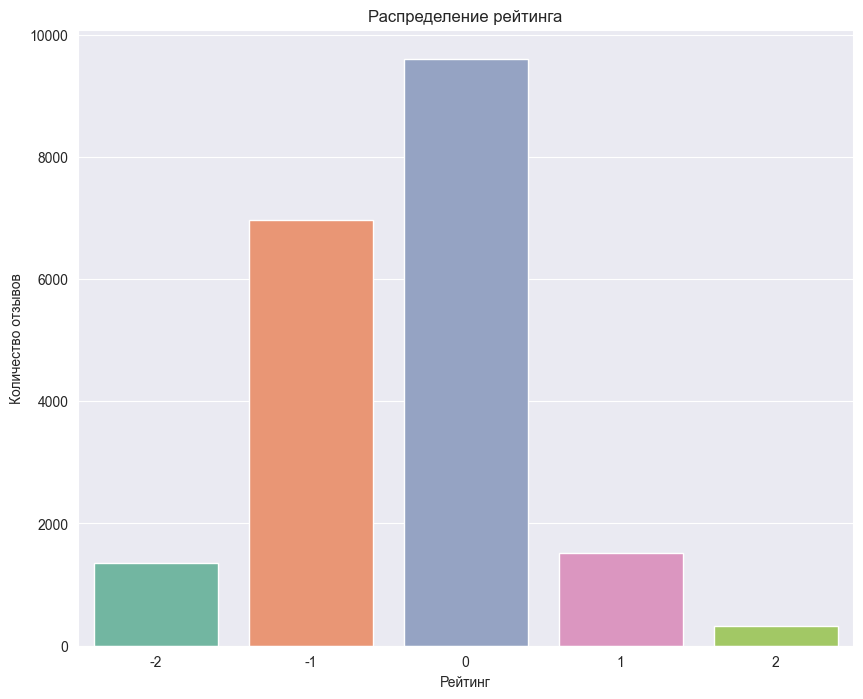

In [12]:
fig = plt.figure(figsize=(10, 8))
sns.countplot(x='rating', data=train);
plt.title("Распределение рейтинга");
plt.xlabel("Рейтинг");
plt.ylabel("Количество отзывов");

0.0    8313
1.0    1830
Name: label, dtype: int64


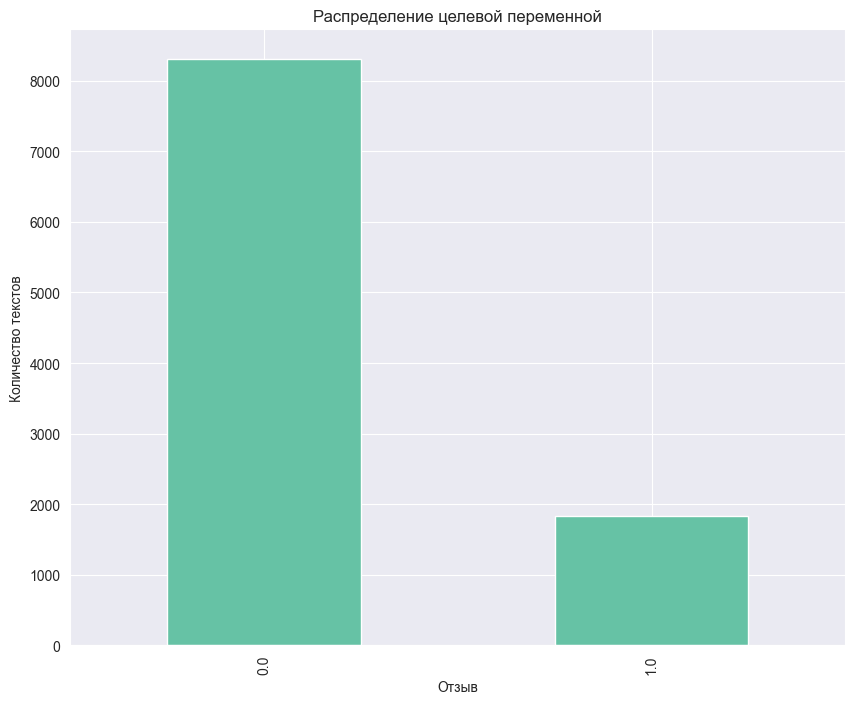

In [14]:
fig = plt.figure(figsize=(10, 8))
train['label'].value_counts().plot(kind='bar');
print(train['label'].value_counts())
plt.title("Распределение целевой переменной");
plt.xlabel("Отзыв");
plt.ylabel("Количество текстов");

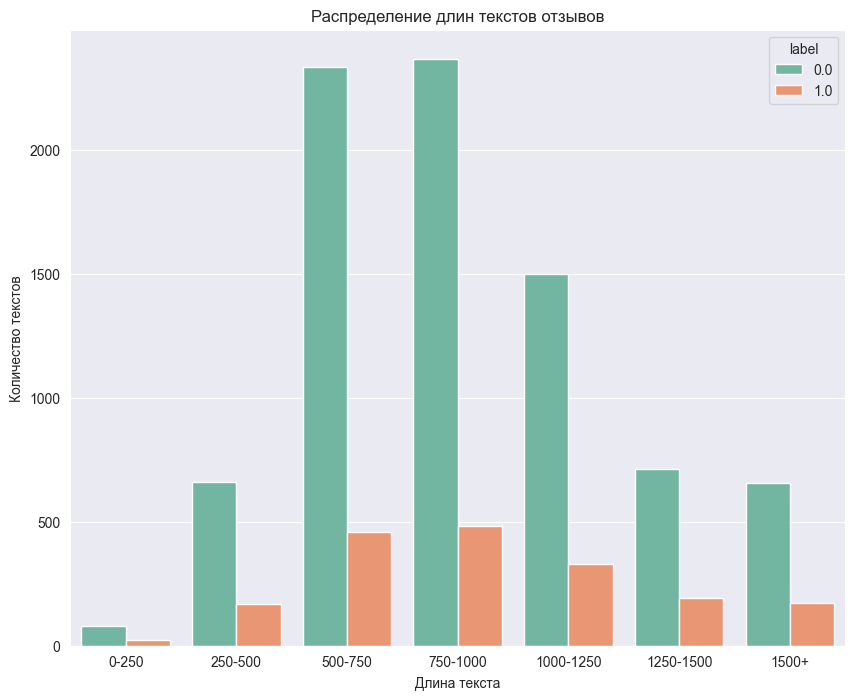

In [15]:
df = train.copy()
df['length'] = pd.cut(train['length'], bins=[0, 250, 500, 750, 1000, 1250, 1500, float('inf')],
                      labels=['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-1500', '1500+'])

fig = plt.figure(figsize=(10, 8))
sns.countplot(x='length', hue='label', data=df);
plt.title("Распределение длин текстов отзывов");
plt.xlabel("Длина текста");
plt.ylabel("Количество текстов");
